In [17]:
# Exercise 2 Linear Regression

# Data is roughly based on 2000 CDC growth figures
# for boys
# Downloaded from http://openclassroom.stanford.edu/MainFolder/courses/MachineLearning/exercises/ex2materials/ex2Data.zip

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# x refers to a boy's age                                                 
# y is a boy's height in meters                                           
#
# Load age and height data
# Prepend a column with ones for x, this will be used later to calculate gradient descent


x = np.genfromtxt('ex2x.dat')

y = pd.DataFrame(np.genfromtxt('ex2y.dat'))

# number of training examples
m = len(y)

# Plot the training data
plt.plot(x, y, 'o')
plt.xlabel('Age in years')
plt.ylabel('Height in meters')

In [18]:
# Gradient descent
# Add a column of ones to x

x = np.expand_dims(x, axis=1)
x = np.insert(x, 0, 1, 1)

# initialize fitting parameters
theta = np.zeros(np.array(np.shape(x[1,:])))

y = np.genfromtxt('ex2y.dat')
m = len(y)

MAX_ITR = 1500;
alpha = 0.07; # Learning rate

for i in range(MAX_ITR):
    # This is a vectorized version of the
    # gradient descent update formula
    
    # Here is the gradient
    grad = (x.transpose() / m).dot(x.dot(theta) - y)
    
    # Here is the actual update
    theta = theta - (alpha * grad)
    
print theta

[ 0.75015039  0.06388338]


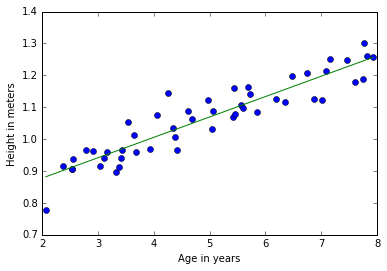

In [19]:
# Plot the linear fit
plt.hold()
plt.plot(x[:,1], x.dot(theta), '-')
plt.show()

In [20]:
# Predict values for age 3.5 and 7

print [1, 3.5] * theta
print [1, 7] * theta

[ 0.75015039  0.22359181]
[ 0.75015039  0.44718363]


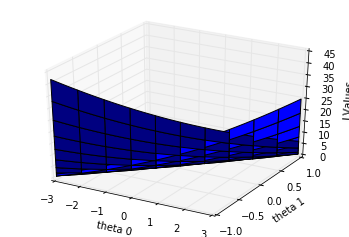

In [33]:
theta0 = np.linspace(-3, 3, 100)
theta1 = np.linspace(-1, 1, 100)

j_vals = np.zeros((len(theta0), len(theta1)))

for i in range(len(theta0)):
    for j in range(len(theta1)):
        t = [theta0[i], theta1[j]]
        j_vals[i,j] = (0.5/m) * (x.dot(t) - y).transpose().dot(x.dot(t) -y)


# Because of the way meshgrids work in the surf command, we need to
# transpose J_vals before calling surf, or else the axes will be flipped

j_vals = j_vals.transpose()
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(theta0, theta1, j_vals)
ax.set_xlabel('theta 0')
ax.set_ylabel('theta 1')
ax.set_zlabel('J Values')

plt.show()

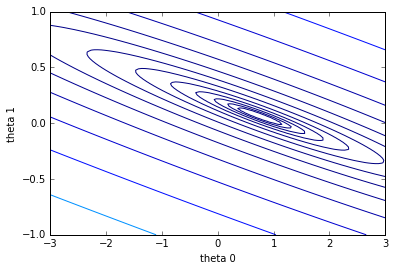

In [35]:
plt.contour(theta0, theta1, j_vals, np.logspace(-2, 2, 15))
plt.xlabel('theta 0')
plt.ylabel('theta 1')

plt.show()